In [7]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_lib import *
import random
import time

# plotting
def plot_b0_b1(mal, F1, F2, x0, x):
    plt.style.use('seaborn')
    plt.figure()
    plt.plot(mal, F1, marker='o', markersize=6, linewidth=4, label='D')
    plt.plot(mal, F2, marker='s', markersize=6, linewidth=4, linestyle='--', label='D\'')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('resources allocated to attacker', fontsize=22)
    plt.ylabel('frequency', fontsize=22)
    plt.legend(loc='best', fontsize=22)
    plt.grid(True)
    plt.savefig('uni.pdf', bbox_inches="tight")
    plt.show()

Simulation of 100 million rounds for mechanism UNI

Parameter set 1: x_l = -10, x_r = 10

Parameter set 2: x_l = -10, x_r = 15 

Estimate Runtime: ~ 12 mins for each parameter set

-10 10
x_l, x_r -10 10


/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_4151/1744476316.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


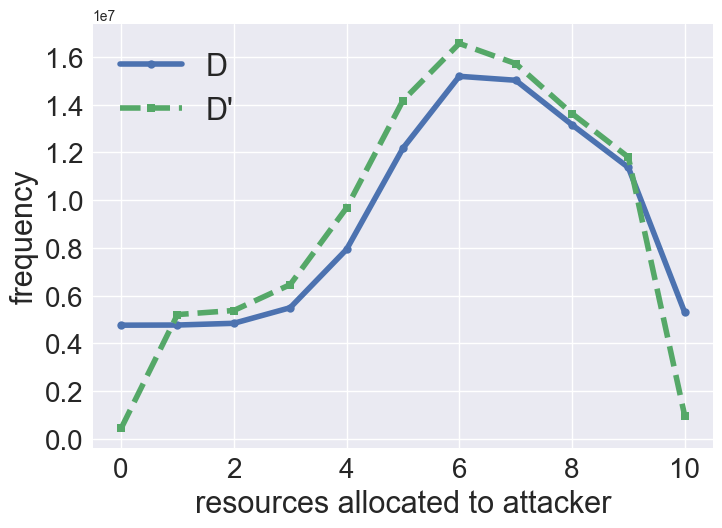

utility: 0.5803550880000022
-10 15
x_l, x_r -10 15


/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_4151/1744476316.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


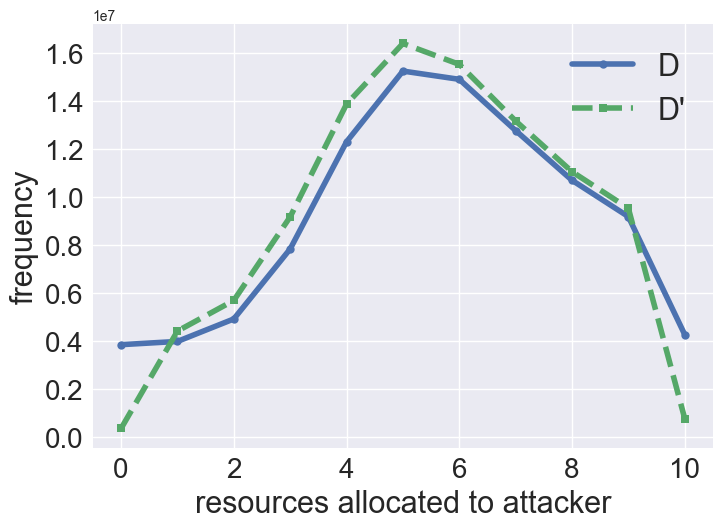

utility: 0.5526914009999954
total time (secs) for this cell:  1451.5667579174042


In [8]:
# Parameter default setup
start = time.time()
p = 0
c = 0
lamda = 0

noise_type = 'uniform'
RD = 100000000
k = 10  # resource capacity
m = k  # best strategy

x0 = -10
X = [10, 15]
result = []
utility = []
OFFSET = [0]
for offset in OFFSET:
    for x in X:
        x0 = x0
        x = x
        F = []
        F_prime = []
        a = []
        b = []
        uti = []
        print(x0, x)
        for rd in range(RD):
            # add noise to neighboring dataset D and D'
            f, f_prime = add_noise(x0=x0, k=k, m=m, noise_type=noise_type, x=x, p=p, c=c, lamda=lamda, miu=0, s=0)
            F.append(f)
            F_prime.append(f_prime)
            # allocate resources to concurrent requests
            ra_f, ra_f_p, u = allocation(f=f, f_prime=f_prime, m=m, k=k)
            a.append(ra_f)
            b.append(ra_f_p)
            uti.append(u)

        # calculate average utility of all rounds of simulation
        utility.append(np.mean(uti))
        # counting number of resources allocated to attacker before and after RA
        
        Before_RA_F, Before_RA_F_p = counter_process(F=F, F_prime=F_prime)
        After_RA_F, After_RA_F_p = counter_process(F=a, F_prime=b)
        print('x_l, x_r', x0, x)
        plot_b0_b1(range(11), After_RA_F, After_RA_F_p, x0=x0, x=x)
        # print(str(noise_type) + " - Simulation (k = " + str(k) + "), before RA:",
            #   max(non_inf(np.log(find_max(Before_RA_F, Before_RA_F_p)))))
        # r = max(non_inf(np.log(find_max(After_RA_F, After_RA_F_p))))
        # print('max (y) at:', non_inf(np.log(find_max(After_RA_F, After_RA_F_p))).index(r))
        # print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA:", r)
        # result.append(r)
        print("utility:", np.mean(uti))

print("total time (secs) for this cell: ", time.time() - start)
